# Modules & packages

The real power of Python is not its syntax (although that is certainly a big positive), but in its vast set of modules and packages. These packages perform everything from operating system functions to advanced statistics to website creation.

Python is a very broadly applicable language, where you can build complex, multi-purpose projects in the same language.

A ``.py`` file intended to be imported into Python is called a "module". Modules are imported using the `import` keyword:

In [ ]:
import os

This gives us the ability to use custom functions built and stored within those libraries. For example, `os.listdir` for listing a directory of files:

In [ ]:
os.listdir("/data")[:5]  # the [:5] just shows the first five, we will come back to this syntax

['network_example.png',
 'coil_2000.csv',
 'xlwings',
 'cities_only.csv',
 'abalone.csv']

You can get a listing of all available functions and attributes in a module using `dir`:

In [ ]:
dir(os)

Additionally, you can get the help on something by passing it to the help function, or by putting a `?` after it using Jupyter or IPython:

In [ ]:
help(os.listdir)

In [ ]:
os.listdir?

Additionally, we can import just a single function from a module, such as this function from `pandas` for generating date ranges:

In [ ]:
from pandas import date_range

In [ ]:
date_range("2017-01-01", "2017-01-31")

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31'],
              dtype='datetime64[ns]', freq='D')

A built-in Python function called `len` can be called on any collection of objects to find out its length:

In [ ]:
len(date_range("2017-01-01", "2017-01-31"))

We can also rename packages on import using `as`. This is mostly to save typing rather than referring to a long module name repeatedly. This is very common, especially for popular libraries such as NumPy, Pandas and Matplotlib:

In [ ]:
import numpy as np

np.sin(np.pi / 2)

1.0

In [ ]:
import pandas as pd

pd.Series([1, 2, 3], index=["x", "y", "z"])

x    1
y    2
z    3
dtype: int64

In [7]:
%matplotlib inline

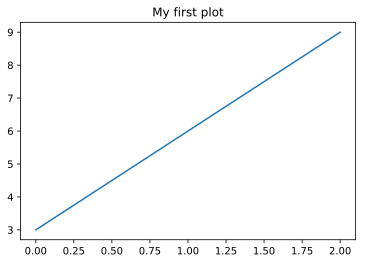

In [8]:
from matplotlib import pyplot as plt
plt.title("My first plot")
plt.plot([3, 6, 9])

In [9]:
import string

In [10]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

**Exercises**

1. Print out the `path` list in the `sys` module. This is where Python looks for modules and packages.
2. You can get a bunch of string attributes from the `string` module. For instance `ascii_letters` gives a list of the standard English characters. How many characters are there?
3. Using the `random` module's `choice` function, choose an English character at random from the list.
4. Check the help for this function using `help(random.sample)`. Can you use this function to generate a random 6 digit code?

In [11]:
# See solutions/modules.py

## Custom modules
You can create your own modules by putting some Python code in a file with a `.py` extension and putting that file somewhere on `sys.path` (the easiest spot is usually the current working directly). Create your own module in this way and try importing it.

Note that every line in the file is run upon import, so modules normally just define reusable functions, classes etc., rather than doing anything special in this way. This means any code outside of a function or class is actually executed!

### Extended Exercises

Note: Extended Exercises are for those who have prior experience with programming, and may require external research or knowledge.

1. Prove that any code in a module is *executed* when it is first run by putting some `print()` calls in it. What security implications does this have?
2. The `sys.modules` attribute stores a cache of the loaded modules by name in a dictionary. Check that, if your module is in `sys.modules`, that importing it again does *not* cause its code (e.g. any print() calls it contains) to be run again.
3. To reload a module you need to use the `reload` function from the `importlib` package. Import your module, change your module on disk, and then reload it and confirm that you have the new version in your Python session.


## Packages

A folder containing one or more modules (``.py`` files) is called a **package**. Here is an example package structure:

In [ ]:
sound/                   Top-level package
    __init__.py          Initialize the sound package
    formats/             Subpackage for format conversions
        __init__.py
        wavread.py
        wavwrite.py
        ...
    effects/             Subpackage for sound effects
        __init__.py
        echo.py
        ...

The special ``__init__.py`` files are run when you ``import`` the name of the directory they are inside. They define the package's contents after import. These are optional on Python 3.x. (On Python 2.x they are required, but can be zero bytes.) You can place any code you like in here; usually they just contain initialization code and imports from deeper levels of modules so you can import from them easily.

To import from this hypothetical ``sound`` package we can use one of these import forms:

In [ ]:
# Option 1: importing the module explicitly
import sound.formats.wavread
# and then:
sound.formats.wavread.wav_to_aiff('ding.wav', 'ding.aiff')

In [ ]:
# Option 2: importing a single module
from sound.formats import wavread

wavread.wav_to_aiff('ding.wav', 'ding.aiff')

In [ ]:
# Option 3: pulling in one or more functions
from sound.formats.wavread import wav_to_aiff, wav_to_mp3  # etc.

wav_to_aiff('ding.wav', 'ding.aiff')

### Exercise: Importing from a package

Here is a basic `BankAccount` class.

In [ ]:

class BankAccount:
    
    def __init__(self, initial_balance=0):
        self.balance = initial_balance
        
    def deposit(self, amount):
        self.balance += amount
        return self.balance
    
    def withdraw(self, amount):
        self.balance -= amount
        return self.balance
    
    def overdrawn(self):
        return self.balance < 0

Put it into an appropriate spot so that is can be imported and run with the following code:

In [ ]:
from banking.customers import BankAccount

In [ ]:
account = BankAccount(500)
print(account.deposit(1000))  # Should print 1500